# EE16A: Homework 2

## Problem 2: Finding Charges from Potential Measurements

In [1]:
import numpy as np

r11 = np.sqrt(2); r12 = np.sqrt(5); r13 = 2
r21 = 1; r22 = np.sqrt(2); r23 = 1
r31 = 2; r32 = np.sqrt(5); r33 = np.sqrt(2)

y1 = (4 + 3*np.sqrt(5) + np.sqrt(10)) / (2*np.sqrt(5))
y2 = (2 + 4*np.sqrt(2)) / (np.sqrt(2))
y3 = (4 + np.sqrt(5) + 3*np.sqrt(10)) / (2*np.sqrt(5))

a = np.array([
    [1/r11, 1/r12, 1/r13],
    [1/r21, 1/r22, 1/r23],
    [1/r31, 1/r32, 1/r33]
])
b = np.array([y1, y2, y3])
x = np.linalg.solve(a, b)
print(x)

[1. 2. 3.]


## Problem 4: Fountain Codes

The answer states that we can reconstruct the message using any 4 out of the 7 tokens transmitted. Here we iterate through all possible combinations of 4 tokens (and their corresponding vectors) and test that out of each set there are 3 vectors that can be merged into an invertible matrix. We also try the decryption using the example message in part (e).

In [ ]:
import numpy as np
v = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 1, 0],
              [1, 0, 1],
              [0, 1, 1],
              [1, 1, 1]])
message = np.array([6, -4, -3]) # message from part (e)

transmission = np.dot(v, message) # the transmitted tokens

# Iterate through all combinations of 4 vectors
for i in range(4): #all sets of 4 vectors contain at least one vector from the first four
    for j in range(i+1,5): #we increment so we don't repeat vectors to test
        for k in range(j+1,6):
            for l in range(k+1,7):
                # Check that we can reconstruct the original message with only 3 of the 4 vectors.
                print("Trying vectors {}, {}, {}, {}...".format(i+1, j+1, k+1, l+1)) # one-indexed
                inverse_v = []
                received_signal = []                
                try:
                    # Check if we can reconstruct using only v_i, v_j, v_k
                    inverse_v = np.linalg.inv(v[[i,j,k]])
                    received_signal = np.choose([i,j,k],transmission) #this function results in [v_i, v_j, v_k]
                    print("Vectors {}, {} and {} are invertible.".format(i+1, j+1, k+1))
                except:
                    # Otherwise reconstruct using v_i, v_j, v_l
                    inverse_v = np.linalg.inv(v[[i,j,l]])
                    received_signal = np.choose([i,j,l],transmission)
                    print("vectors {}, {} and {} are invertible.".format(i+1, j+1, l+1))
                print("Received message: {}".format(np.dot(inverse_v, received_signal)))
                print("")

## Problem 5: Kinematic Model for a Simple Car

This script helps to visualize the difference between a nonlinear model and a corresponding linear approximation for a simple car.  What you should notice is that the linear model is similar to the nonlinear model when you are close to the point where the approximation is made.

First, run the following block to set up the helper functions needed to simulate the vehicle models and plot the trajectories taken.

In [2]:
''' Problem/Model Setup'''
import numpy as np
import matplotlib.pyplot as plt

# Vehicle Model Constants
L = 1.0  # length of the car, meters
dt = 0.1 # time difference between timestep (k+1) and timestep k, seconds

''' Nonlinear Vehicle Model Update Equation '''
def nonlinear_vehicle_model(initial_state, inputs, num_steps):
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        x_next     = x     + v * np.cos(theta) * dt
        y_next     = y     + v * np.sin(theta) * dt
        theta_next = theta + v/L * np.tan(phi) * dt
        v_next     = v     + a * dt
        
        # Add the next state to the history.
        state_history.append([x_next,y_next,theta_next,v_next])
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        x = x_next
        y = y_next
        theta = theta_next
        v = v_next
        
    return np.array(state_history)

''' Linear Vehicle Model Update Equation '''
def linear_vehicle_model(A, B, initial_state, inputs, num_steps):
    # Note: A should be a 4x4 matrix, B should be a 4x2 matrix for this linear model.
    
    x     = initial_state[0] # x position, meters
    y     = initial_state[1] # y position, meters
    theta = initial_state[2] # heading (wrt x-axis), radians
    v     = initial_state[3] # speed, meters per second
    
    a = inputs[0]            # acceleration, meters per second squared
    phi = inputs[1]          # steering angle, radians
    
    state_history = []       # array to hold state values as the time step k advances.
    state_history.append([x,y,theta,v]) # add the initial state (i.e. k = 0) to history.
    
    for i in range(0, num_steps):
        # Find the next state, at time k+1, by applying the nonlinear model to the current state, at time k.
        state_next = np.dot(A, state_history[-1]) + np.dot(B, inputs)
                
        # Add the next state to the history.
        state_history.append(state_next)
        
        # Advance to the next state, at time k+1, to get ready for next loop iteration.
        state = state_next
        
    return np.array(state_history)

''' Plotting Setup'''
def make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear):
    f = plt.figure()
    plt.plot(state_predictions_nonlinear[0,0], state_predictions_nonlinear[0,1], 'go', label='Start')
    plt.plot(state_predictions_nonlinear[:,0], state_predictions_nonlinear[:,1], 'r', label='Nonlinear')
    plt.plot(state_predictions_linear[:,0], state_predictions_linear[:,1], 'k.', label='Linear')
    plt.legend(loc='upper left')
    plt.xlim([4, 8])
    plt.ylim([9, 12])
    plt.show()

### Part B

Task: Fill in the matrices A and B for the linear system approximating the nonlinear vehicle model under small heading and steering angle approximations.

In [3]:
A = np.array([[1,0,0,dt], 
              [0,1,0,0], 
              [0,0,1,0], 
              [0,0,0,1]])

B = np.array([[0,0], 
              [0,0], 
              [0,0], 
              [dt,0]])

### Part C

Task: Fill out the state and input values from Part C and look at the resulting plot. The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.


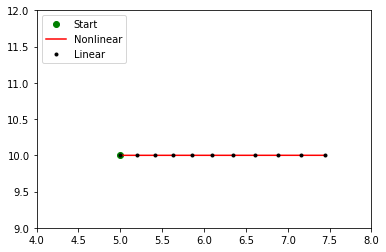

[7.44999998e+00 1.00002697e+01 2.45000001e-04 3.00000000e+00]
[ 7.45 10.    0.    3.  ]


In [17]:
x_init  = 5.0
y_init  = 10.0
theta_init = 0.0
v_init     = 2.0
a_input    = 1.0
phi_input  = 0.0001

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)

# The problem didn't ask you for the actual values, but it is useful to see where we end up after one time step in both cases.

print(state_predictions_nonlinear[10])
print(state_predictions_linear[10])


### Part D
    
Task: Fill out the state and input values from Problem D and look at the resulting plot.  The plot should help you to visualize the difference between using a linear model and a nonlinear model for this specific starting state and input.

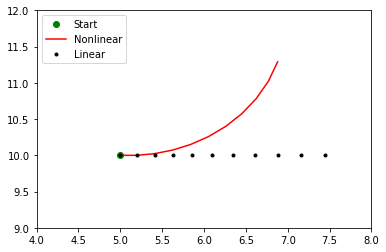

[ 6.87984693 11.28998941  1.3384411   3.        ]
[ 7.45 10.    0.    3.  ]


In [16]:
x_init  = 5.0
y_init  = 10.0
theta_init = 0.0
v_init     = 2.0
a_input    = 1.0
phi_input  = 0.5

state_init = [x_init, y_init, theta_init, v_init]
state_predictions_nonlinear = nonlinear_vehicle_model(state_init, [a_input, phi_input], 10)
state_predictions_linear = linear_vehicle_model(A, B, state_init, [a_input, phi_input], 10)

make_model_comparison_plot(state_predictions_nonlinear, state_predictions_linear)

# The problem didn't ask you for the actual values, but it is useful to see where we end up after ten time step in both cases.

print(state_predictions_nonlinear[10])
print(state_predictions_linear[10])




## Problem 7: Image Stitching

This section of the notebook continues the image stiching problem. Be sure to have a `figures` folder in the same directory as the notebook. The `figures` folder should contain the files:

    Berkeley_banner_1.jpg
    Berkeley_banner_2.jpg
    stacked_pieces.jpg
    lefthalfpic.jpg
    righthalfpic.jpg
    
Note: This structure is present in the provided HW2 zip file.

Run the next block of code before proceeding


In [ ]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import pi, cos, exp, sin
import matplotlib.image as mpimg
import matplotlib.transforms as mtransforms


#%matplotlib inline

#loading images
image1=mpimg.imread('figures/Berkeley_banner_1.jpg')
image1=image1/255.0
image2=mpimg.imread('figures/Berkeley_banner_2.jpg')
image2=image2/255.0
image_stack=mpimg.imread('figures/stacked_pieces.jpg')
image_stack=image_stack/255.0


image1_marked=mpimg.imread('figures/lefthalfpic.jpg')
image1_marked=image1_marked/255.0
image2_marked=mpimg.imread('figures/righthalfpic.jpg')
image2_marked=image2_marked/255.0

def euclidean_transform_2to1(transform_mat,translation,image,position,LL,UL):
    new_position=np.round(transform_mat.dot(position)+translation)
    new_position=new_position.astype(int)

    
    if (new_position>=LL).all() and (new_position<UL).all():
        values=image[new_position[0][0],new_position[1][0],:]
    else:
        values=np.array([2.0,2.0,2.0])
    
    return values

def euclidean_transform_1to2(transform_mat,translation,image,position,LL,UL):
    transform_mat_inv=np.linalg.inv(transform_mat)
    new_position=np.round(transform_mat_inv.dot(position-translation))
    new_position=new_position.astype(int)
    
    if (new_position>=LL).all() and (new_position<UL).all():
        values=image[new_position[0][0],new_position[1][0],:]
    else:
        values=np.array([2.0,2.0,2.0])
    
    return values

def solve(A,b):
    try:
        z = np.linalg.solve(A,b)
    except:
        raise ValueError('Rows are not linearly independent. Cannot solve system of linear equations uniquely. :)')
    return z

We will stick to a simple example and just consider stitching two images (if you can stitch two pictures, then you could conceivably stitch more by applying the same technique over and over again).

Daniel decided to take an amazing picture of the Campanile overlooking the bay. Unfortunately, the field of view of his camera was not large enough to capture the entire scene, so he decided to take two pictues and stich them together. 

The next block will display the two images.

In [ ]:
plt.figure(figsize=(20,40))

plt.subplot(311)
plt.imshow(image1)

plt.subplot(312)
plt.imshow(image2)

plt.subplot(313)
plt.imshow(image_stack)

plt.show() 

Once you apply Marcela's algorithm on the two images you get the following result (run the next block):

In [ ]:
plt.figure(figsize=(20,30))

plt.subplot(211)
plt.imshow(image1_marked)

plt.subplot(212)
plt.imshow(image2_marked)

As you can see Marcela's algorithm was able to find four common points between the two images. These points expressed in the coordinates of the first image and second image are

$\begin{align} 
&&\vec{p_1}=\begin{bmatrix} 200 \\ 700 \end{bmatrix}
&&\vec{p_2}=\begin{bmatrix} 310 \\ 620 \end{bmatrix} 
&&\vec{p_3}=\begin{bmatrix} 390 \\ 660 \end{bmatrix}
&&\vec{p_4}=\begin{bmatrix} 460 \\ 630 \end{bmatrix}\\
&&\vec{q_1}=\begin{bmatrix} 162.2976 \\ 565.8862 \end{bmatrix}
&&\vec{q_2}=\begin{bmatrix} 285.4283 \\ 458.7469 \end{bmatrix} 
&&\vec{q_3}=\begin{bmatrix} 385.2465 \\ 498.1973 \end{bmatrix}
&&\vec{q_4}=\begin{bmatrix} 465.7892 \\ 455.0132 \end{bmatrix}
\end{align}$

It should be noted that in relation to the image the positive x-axis is down and the positive y-axis is right. This will have no bearing as to how you solve the problem, however it helps in interpreting what the numbers mean relative to the image you are seeing.

Using the points determine the parameters $R_{11},R_{12},R_{21},R_{22},T_x,T_y$ that map the points from the first image to the points in the second image by solving an appropriate system of equations. Hint: you do not need all the points to recover the parameters. 

In [ ]:
# Note that the following is a general template for solving for 6 unknowns from 6 equations represented as Az = b.
# You do not have to use the following code exactly. 
# All you need to do is to find parameters R_11, R_12, R_21, R_22, T_x, T_y. 
# If you prefer finding them another way it is fine.

A = np.array([[200, 700, 0, 0, 1, 0],
              [0, 0, 200, 700, 0, 1 ],
              [310, 620, 0, 0, 1, 0],
              [0, 0, 310, 620, 0, 1 ],
              [460, 630, 0, 0, 1, 0],
              [0, 0, 460, 630, 0, 1 ]])

b = np.array([[162.2976], [565.8862], [285.4283], [458.7469], [465.7892], [455.0132]])

A = A.astype(float)
b = b.astype(float)

# solve the linear system for the coefficiens
z = solve(A,b)

#Parameters for our transformation
R_11 = z[0,0]
R_12 = z[1,0]
R_21 = z[2,0]
R_22 = z[3,0]
T_x  = z[4,0]
T_y  = z[5,0]

Stitch the images using the transformation you found by running the code below.

### Note that it takes about 40 seconds for the block to finish running on a modern laptop.



In [ ]:
matrix_transform=np.array([[R_11,R_12],[R_21,R_22]])
translation=np.array([T_x,T_y])

#Creating image canvas (the image will be constructed on this)
num_row,num_col,blah=image1.shape
image_rec=1.0*np.ones((int(num_row),int(num_col),3))

#Reconstructing the original image

LL=np.array([[0],[0]]) #lower limit on image domain
UL=np.array([[num_row],[num_col]]) #upper limit on image domain

for row in range(0,int(num_row)):
    for col in range(0,int(num_col)):
        #notice that the position is in terms of x and y, so the c  
        position=np.array([[row],[col]])       
        if image1[row,col,0] > 0.995 and image1[row,col,1] > 0.995 and image1[row,col,2] > 0.995:
            temp = euclidean_transform_2to1(matrix_transform,translation,image2,position,LL,UL)
            image_rec[row,col,:] = temp
        else:
            image_rec[row,col,:] = image1[row,col,:]
        

plt.figure(figsize=(20,20))
plt.imshow(image_rec)
plt.axis('on')
plt.show()

### Part E: Failure Mode Points

$\begin{align} 
&&\vec{p_1}=\begin{bmatrix} 390 \\ 660 \end{bmatrix}
&&\vec{p_2}=\begin{bmatrix} 425 \\ 645 \end{bmatrix}
&&\vec{p_3}=\begin{bmatrix} 460 \\ 630 \end{bmatrix}\\
&&\vec{q_1}=\begin{bmatrix} 385 \\ 450 \end{bmatrix}
&&\vec{q_2}=\begin{bmatrix} 425 \\ 480 \end{bmatrix}
&&\vec{q_3}=\begin{bmatrix} 465 \\ 510 \end{bmatrix}
\end{align}$

In [ ]:
# Note that the following is a general template for solving for 6 unknowns from 6 equations represented as Az = b.
# You do not have to use the following code exactly. 
# All you need to do is to find parameters R_11, R_12, R_21, R_22, T_x, T_y. 
# If you prefer finding them another way it is fine.

# fill in the entries
A = np.array([[390,660,0,0,1,0],
              [0,0,390,660,0,1],
              [425,645,0,0,1,0],
              [0,0,425,645,0,1],
              [460,630,0,0,1,0],
              [0,0,460,630,0,1]])

# fill in the entries
b = np.array([[385],[450],[425],[480],[465],[510]])

A = A.astype(float)
b = b.astype(float)

# solve the linear system for the coefficiens
z = solve(A,b)

#Parameters for our transformation
R_11 = z[0,0]
R_12 = z[1,0]
R_21 = z[2,0]
R_22 = z[3,0]
T_x  = z[4,0]
T_y  = z[5,0]